# Cross-Validation 

|     Concept     |     Function     |
|:---------------:|:----------------:|
|sklearn.model_selection.cross_val_score() | k-fold cross-validation |
|sklearn.model_selection.ShuffleSplit | Shuffle-split cross-validation |
|sklearn.model_selection.StratifiedShuffleSplit	| stratified Shuffle split CV |
|sklearn.utils.resample() | Select sample from dataset |

In [1]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X, y = make_moons(noise=0.3)
X.shape, y.shape

((100, 2), (100,))

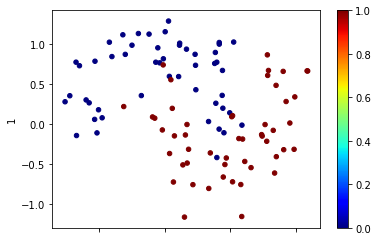

In [3]:
df = pd.DataFrame(X)
df.plot.scatter(0,1, c=y, cmap='jet')

In [4]:
m = LogisticRegression()
m.fit(X,y)
m.score(X,y)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.84

### Overfitting - When the model trains too much and well on the data we've put in. The accuracy of your prediction for the training data will always near 100%, but the model won't be able to learn from new data, and will result in low accuracies.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X, y = make_moons(noise=0.3, n_samples=200)

In [7]:
m = LogisticRegression()
m.fit(X,y)
m.score(X,y)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.83

#### Train Test Split

It splits both the X and y array and we get 75% in one set and 25% in the other - can include test_size to dictate the split that we want (in this case, 80%/20%)

This is done randomly, if we need reproducability we include random_state!

Can now use data training set to train my model:

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                               random_state=42)

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((160, 2), (160,), (40, 2), (40,))

In [9]:
m = LogisticRegression()
m.fit(Xtrain,ytrain)
print(f'train score: {m.score(Xtrain, ytrain)}')

train score: 0.83125


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
print(f'test score: {m.score(Xtest, ytest)}')

test score: 0.825


### If Training Score > Test Score we have Overfitting!

Ideally the train score is good and close to the test score.

To get rid of overfitting we should include more data points!

We can also fix random_state for X, y too!

In [11]:
X, y = make_moons(noise=0.3, n_samples=20000)

In [12]:
m = LogisticRegression()
m.fit(X,y)
m.score(X,y)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.85295

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                               random_state=42)

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((16000, 2), (16000,), (4000, 2), (4000,))

In [14]:
m = LogisticRegression()
m.fit(Xtrain,ytrain)
print(f'train score: {m.score(Xtrain, ytrain)}')

train score: 0.85175


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print(f'test score: {m.score(Xtest, ytest)}')

test score: 0.857


## K-fold Cross-validation

* Pro: does not use the test set
* Pro: fast
* Pro: pragmatic way to try different models and/or hyperparameters
* Con: not super-accurate

|     Concept     |     Function     |
|:---------------:|:----------------:|
|sklearn.model_selection.cross_val_score() | k-fold cross-validation |
|sklearn.model_selection.ShuffleSplit | Shuffle-split cross-validation |
|sklearn.model_selection.StratifiedShuffleSplit	| stratified Shuffle split CV |
|sklearn.utils.resample() | Select sample from dataset |

### Cross-validation is a more sophisticated way to find out how good our model is, and makes sure that we are not lucky with our random scores generating a test greater than a train!

We want to reduce the sampling bias as a possible cause for overfitting and we want to be really sure that our model is well-fit (not overfit) and ensuring we don't have any sample bias!

We can leave our test set untouched. Split the dataset and leave the test on the side so we don't have that set ruining our training model!

**K-fold Cross-Validation divides the dataset into k portions called folds. Each fold serves as a test dataset once, and the rest as a training set. This results in a list of k scores that allow to evaluate the robustness of the model.**

We can split our data-set eg into 4 'folds' and leave our test on the side to later test the accuracy, and train our model with the rest of the 3 'folds'.

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(m, Xtrain, ytrain, cv=5)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

array([0.85160887, 0.86004374, 0.8521875 , 0.84995311, 0.84463895])

We get an array of 5 numbers!

- cv of 5 or 10 is a good number 

In [18]:
scores = cross_val_score(m, Xtrain, ytrain, cv=5)
scores.mean(), scores.std()

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

(0.8516864337157161, 0.004955260467073638)

In [19]:
m.fit(Xtrain, ytrain)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's build it:

In [20]:
Xtrain.shape

(16000, 2)

In [21]:
X1, y1 = Xtrain[:4000], ytrain[:4000]
X2, y2 = Xtrain[4000:8000], ytrain[4000:8000]
X3, y3 = Xtrain[8000:12000], ytrain[8000:12000]
X4, y4 = Xtrain[12000:], ytrain[12000:]

In [22]:
X1.shape, X2.shape, X3.shape, X4.shape

((4000, 2), (4000, 2), (4000, 2), (4000, 2))

In [23]:
y1.shape, y2.shape, y3.shape, y4.shape

((4000,), (4000,), (4000,), (4000,))

#### Here, $X{_4}$ will be the validation set:

In [24]:
import numpy as np

XX = np.vstack([X1, X2, X3])
yy = np.hstack([y1, y2, y3])

print(XX.shape, yy.shape)
m.fit(XX, yy)
m.score(X4, y4)

(12000, 2) (12000,)


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8455

#### Now $X{_3}$ is the validation set:

In [25]:
XX = np.vstack([X1, X2, X4])
yy = np.hstack([y1, y2, y4])

print(XX.shape, yy.shape)
m.fit(XX, yy)
m.score(X3, y3)

(12000, 2) (12000,)


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.85525

#### Now $X{_2}$ is the validation set:

In [26]:
XX = np.vstack([X1, X3, X4])
yy = np.hstack([y1, y3, y4])

print(XX.shape, yy.shape)
m.fit(XX, yy)
m.score(X2, y2)

(12000, 2) (12000,)


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.854

#### Now $X{_1}$ is the validation set:

In [27]:
XX = np.vstack([X2, X3, X4])
yy = np.hstack([y2, y3, y4])
m.fit(XX, yy)
m.score(X1, y1)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.85325

#### Cross validation is a tool that allows you to analyse quickly how good your model is!

In [29]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1.0, probability=True)

accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"cross-validation scores: {accuracy}")

cross-validation scores: [0.857  0.8485 0.852  0.859  0.846 ]


### Alternative: Bootstrapping

* Pro: more accurate
* Pro: gives you a confidence interval
* Con: But, takes much longer (train 1000 times, rather than 5 or 10)

If you want to calculate a confidence score for your model (a probability range of the model quality), you have 3 options:

- For some models (e.g. Linear Regression), a confidence interval can be calculated directly using the t distribution
- Other models (e.g. Logistic Regression, SVMs) provide a method to calculate probabilities for predictions.
- But for many models, neither of this works (in particular, Random Forests and Neural Networks). With these, we have to use bootstrapping.
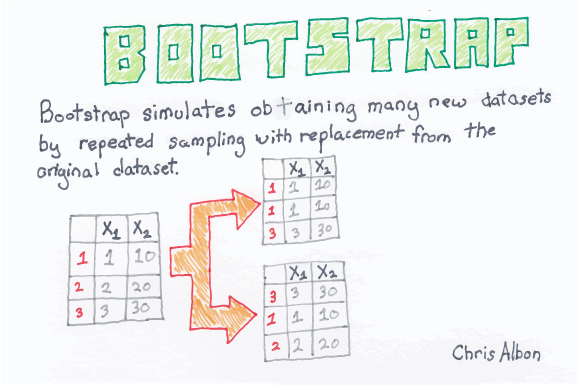

#### The Bootstrap algorithm

1. You have training data with N points.
2. Draw N random points with replacement.
3. Train your model on the sampled data
4. Record the test score
5. Repeat 2.-4. K times
6. Sort all collected scores
7. Calculate the confidence interval by interpreting the list of scores as percentiles.

The scores should be more or less normally distributed for the bootstrapping to be reliable.

Of course, retraining your model 1000 times is costly.

### Exercises:
1. Scoring parameter

Try 5-fold cross-validation with scoring=’precision’ and scoring=’recall’ on the Titanic dataset. How would you interpret the result?

2. Shuffle-Split

Shuffle-Split is a more flexible alternative, especially with large datasets. It allows you to select random samples with a specific size. The stratified variant takes care to select representative features.

3. Cross-Validation

Compare k-fold CV and Shuffle-split CV on the Titanic dataset. What impact does the size of the dataset have?